## Initial setup

In [1]:
import Drone
from configurations import defaultConfig 
import numpy as np
from ConvexMotionPlanning import TrajGenMPP 
from plottingFunctions import state_plots_command, open_loop_plots


In [2]:
# Drone instantiation
config = defaultConfig()
config.numObstacles = 20
drone = Drone.Drone(config, config)

# Parameters
thrustCommandVal = 4.3
refStates = drone.coherentCommand(thrustCommandVal,0/180*np.pi)
controlRef = (thrustCommandVal, drone.elevatorFromAlpha(refStates[1]-refStates[3]))
iterations = 2000
iter = 0
pathDist = 100
stateRef = np.hstack(([0,50], refStates))
drone.reset(stateRef)

# Data
traj = np.zeros((7,iterations))
elvActual = np.zeros(iterations)
thrustCommand = np.zeros(iterations)+thrustCommandVal
stateCommand = drone.coherentCommand(thrustCommand[0],0/180*np.pi)
elivCommandRef = drone.elevatorFromAlpha(stateCommand[1]-stateCommand[3])
elivCommand = np.zeros(iterations) + elivCommandRef
xCommand = np.zeros(iterations)
yCommand = np.zeros(iterations)
refCommand = np.zeros((iterations, 4))
refCommand[0] = refStates

# Main loop
for iter in range(0, iterations):
    action = [thrustCommand[iter], elivCommand[iter], refCommand[iter, :]] 
    observation, grid, reward, terminated = drone.step(action)
    traj[:,iter] = np.hstack((drone.plant.state,drone.plant.time))
    elvActual[iter] = drone.delta_e_actual
    if(iter%pathDist == 0):
        thrustCommand, elivCommand, xCommand, yCommand, refCommand = TrajGenMPP(drone, grid, thrustCommand, elivCommand, xCommand, yCommand, refStates, refCommand, thrustCommandVal,elivCommandRef, iterations, iter)
    if(terminated):
        break

In [3]:
print(terminated)

False


(2000,)


/home/matthew/Documents/Flappy-Junco/plottingFunctions.py:78: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


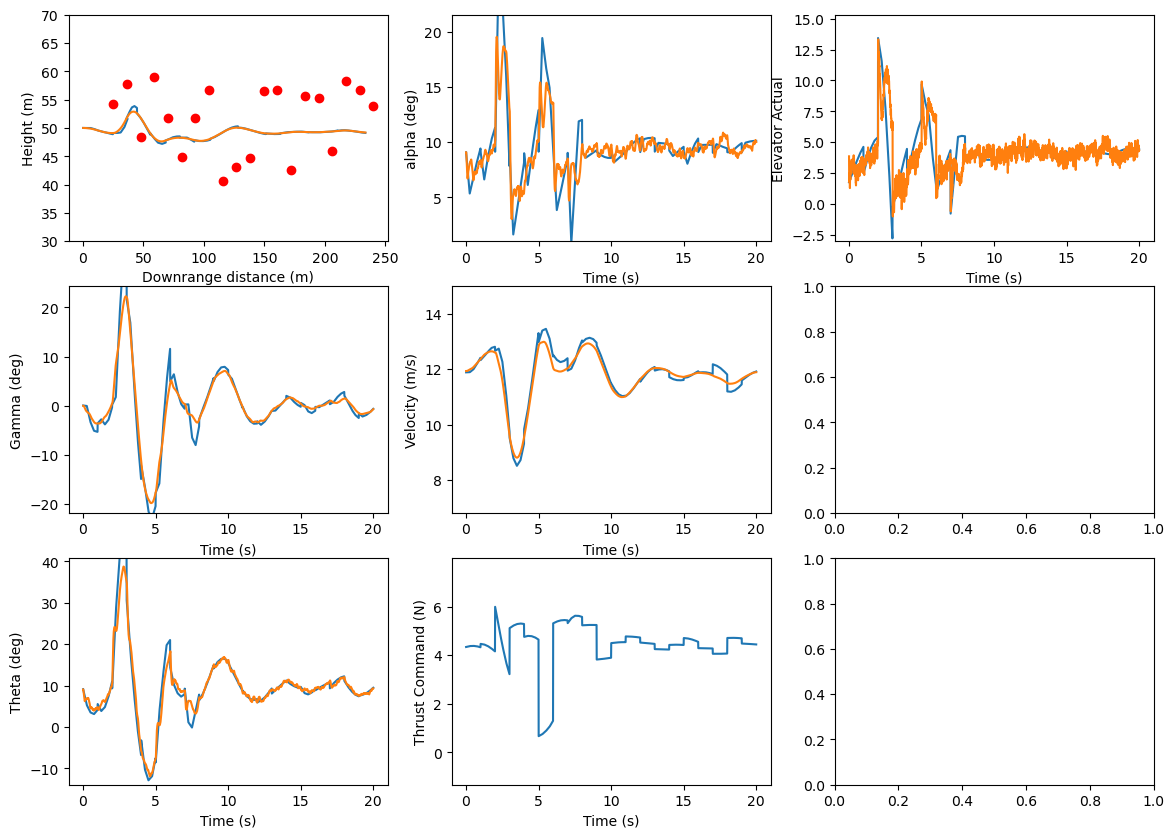

In [4]:
import importlib
import plottingFunctions
importlib.reload(plottingFunctions)
plottingFunctions.state_plots_command(traj,thrustCommand,xCommand, yCommand, elivCommand,elvActual, refCommand, drone)